# **Apartat 3**

En l'apartat 7 dels apunts hem vist una gràfica, també publicada per Our World in Data, que mostra les distribucions de les alçades de les dones de 20 països del Primer Món nascudes entre 1980 i 1990. L'alçada mitjana és de 164,7 cm, amb una desviació estàndard de 7,1 cm.

Crea un altre quadern de Jupyter o Colab on has de fer amb Python (emprant les llibreries que vulguis) el següent:

1. Crea una mostra aleatòria de 1000 elements (individus) que representi les alçades de 1000 dones. Utilitza un decimal de precisió per a cada valor de la mostra.
2. Dibuixa l'histograma de la mostra.
3. Obté els intervals de confiança per a la mitjana amb un nivell de confiança del 90%, 95% i 99%.
4. Calcula les probabilitats següents (expressades en percentatge):
  - Que una dona sigui més baixa de 160 cm
  - Que estigui entre 160 i 170 cm, sense arribar a 170 cm
  - Que estigui entre 170 i 180 cm, sense arribar a 180 cm
  - Que sigui faci 180 cm o més




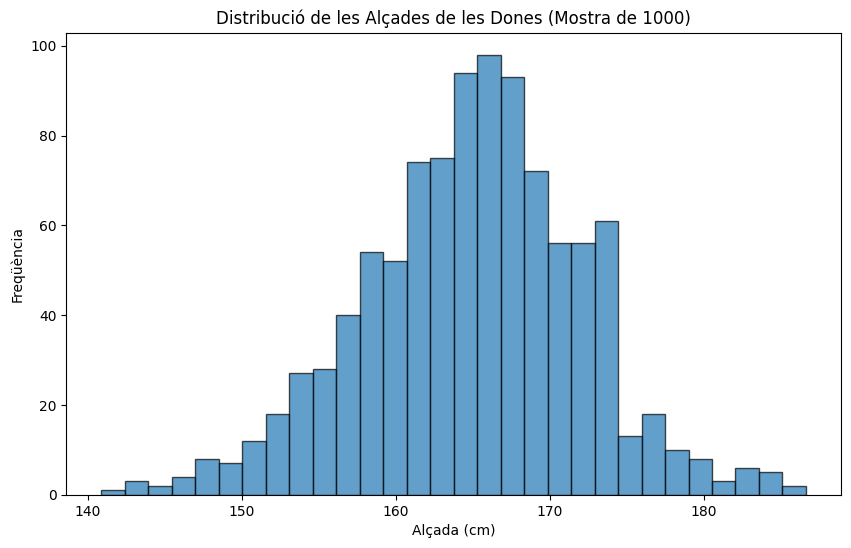

Intervals de confiança per a la mitjana:
90%: (164.33069464460834, 165.06930535539163)
95%: (164.25994552706376, 165.1400544729362)
99%: (164.1216703901256, 165.2783296098744)

Probabilitats:
Probabilitat de ser més baixa de 160 cm: 25.40%
Probabilitat de estar entre 160 i 170 cm: 51.83%
Probabilitat de estar entre 170 i 180 cm: 21.21%
Probabilitat de fer 180 cm o més: 1.56%


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Paràmetres de la distribució normal
mean_height = 164.7  # mitjana en cm
std_dev = 7.1        # desviació estàndard en cm

# Generació de la mostra aleatòria
sample_size = 1000
heights = np.round(np.random.normal(mean_height, std_dev, sample_size), 1)

# Dibuixar l'histograma
plt.figure(figsize=(10, 6))
plt.hist(heights, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribució de les Alçades de les Dones (Mostra de 1000)")
plt.xlabel("Alçada (cm)")
plt.ylabel("Freqüència")
plt.show()

# Calcul dels intervals de confiança
confidence_levels = [0.90, 0.95, 0.99]
intervals = {}

for confidence in confidence_levels:
    z_score = stats.norm.ppf(1 - (1 - confidence) / 2)
    margin_of_error = z_score * (std_dev / np.sqrt(sample_size))
    interval = (mean_height - margin_of_error, mean_height + margin_of_error)
    intervals[f"{int(confidence * 100)}%"] = interval

print("Intervals de confiança per a la mitjana:")
for confidence, interval in intervals.items():
    print(f"{confidence}: {interval}")

# Calcul de probabilitats
prob_less_than_160 = stats.norm.cdf(160, mean_height, std_dev)
prob_between_160_and_170 = stats.norm.cdf(170, mean_height, std_dev) - stats.norm.cdf(160, mean_height, std_dev)
prob_between_170_and_180 = stats.norm.cdf(180, mean_height, std_dev) - stats.norm.cdf(170, mean_height, std_dev)
prob_180_or_more = 1 - stats.norm.cdf(180, mean_height, std_dev)

print("\nProbabilitats:")
print(f"Probabilitat de ser més baixa de 160 cm: {prob_less_than_160 * 100:.2f}%")
print(f"Probabilitat de estar entre 160 i 170 cm: {prob_between_160_and_170 * 100:.2f}%")
print(f"Probabilitat de estar entre 170 i 180 cm: {prob_between_170_and_180 * 100:.2f}%")
print(f"Probabilitat de fer 180 cm o més: {prob_180_or_more * 100:.2f}%")

Les conclusions que es poden extreure son les següents:

1.	Distribució de les alçades:
    - La distribució segueix una forma de campana (distribució normal), amb un pic principal al voltant dels 160-170 cm, indicant que la majoria de les dones tenen una alçada dins d’aquest rang.
2.	Intervals de confiança per a la mitjana:
    - Els intervals de confiança ens mostren un rang probable per a la mitjana d’alçades amb diferents nivells de confiança:
    - 90%: entre 164,33 cm i 165,07 cm.
    - 95%: entre 164,26 cm i 165,14 cm.
    - 99%: entre 164,12 cm i 165,28 cm.
    - Aquests intervals de confiança suggereixen que la mitjana d’alçades de les dones es troba molt probablement dins d’aquests valors.
3.	Probabilitats de diferents rangs d’alçada:
    - Probabilitat de ser més baixa de 160 cm: 25,40%.
    - Probabilitat d’estar entre 160 i 170 cm: 51,83%, indicant que més de la meitat de la població femenina de la mostra es troba dins d’aquest interval.
    - Probabilitat d’estar entre 170 i 180 cm: 21,21%.
    - Probabilitat de fer 180 cm o més: 1,56%, el que indica que és poc comú trobar dones amb una alçada superior a 180 cm en aquesta mostra.

En resum, la majoria de les dones en aquesta mostra tenen una alçada entre 160 i 170 cm, i hi ha una baixa probabilitat de trobar alçades extremes (per sota de 150 cm o per sobre de 180 cm). Els intervals de confiança indiquen que la mitjana d’alçades es troba al voltant dels 164-165 cm.